# Kindle Clippings Data Analysis

Data Analysis and Data Visualization for your Amazon Kindle Clippings!

NOTE: To use, first run [kindle_clippings_parser.ipynb](https://github.com/markwk/qs_ledger/blob/master/kindle/kindle_clippings_parser.ipynb) to parse and collect your device's clippings.

-----

## Dependencies

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

----

## Simple Data Check and Data Analysis

In [2]:
my_clippings = pd.read_csv("data/clippings.csv")

In [3]:
my_clippings.columns = ['author', 'book_title', 'timestamp', 'highlight', 'location',
       'num_pages']

In [4]:
print('{:,} total highlights'.format(len(my_clippings)))
print('{:,} total books'.format(len(my_clippings['book_title'].unique())))
print('{:,} total authors'.format(len(my_clippings['author'].unique())))

13,300 total highlights
401 total books
203 total authors


In [5]:
# date additions
my_clippings['timestamp'] = pd.to_datetime(my_clippings['timestamp'])
my_clippings['date'] = my_clippings['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
my_clippings['year'] = my_clippings['timestamp'].dt.year
my_clippings['month'] = my_clippings['timestamp'].dt.month
my_clippings['mnth_yr'] = my_clippings['timestamp'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
my_clippings['day'] = my_clippings['timestamp'].dt.day
my_clippings['dow'] = my_clippings['timestamp'].dt.weekday
my_clippings['hour'] = my_clippings['timestamp'].dt.hour

In [6]:
my_clippings.tail()

,author,book_title,timestamp,highlight,location,num_pages,date,year,month,mnth_yr,day,dow,hour
13295,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:24:55,Use it to develop a vision for your life and t...,Location 1102-1105,72,2018-08-29,2018,8,2018-08,29,2,22
13296,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:25:10,The Small-Focus Question: “What’s my ONE Thing...,Location 1105-1109,73,2018-08-29,2018,8,2018-08,29,2,22
13297,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:26:12,"“Success is simple. Do what’s right, the right...",Location 1113-1114,73,2018-08-29,2018,8,2018-08,29,2,22
13298,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:30:19,"For example: “For my job, what’s the ONE Thing...",Location 1135-1137,75,2018-08-29,2018,8,2018-08,29,2,22
13299,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 23:57:04,"“People do not decide their futures, they deci...",Location 1186-1188,78,2018-08-29,2018,8,2018-08,29,2,23


----

## Highlights by Book

In [7]:
book_highlights = my_clippings['book_title'].value_counts().sort_values()

In [8]:
# book_most_highlighted = book_highlights.head(30)
(pd.DataFrame(book_highlights)).to_csv("data/book_highlights_count.csv", encoding='utf-8')

In [9]:
book_highlights_count = pd.read_csv("data/book_highlights_count.csv")

In [10]:
book_highlights_count.columns = ['book_title', 'count']

In [11]:
book_most_highlighted = book_highlights_count.tail(30)

In [12]:
# TODO: Trim long titles

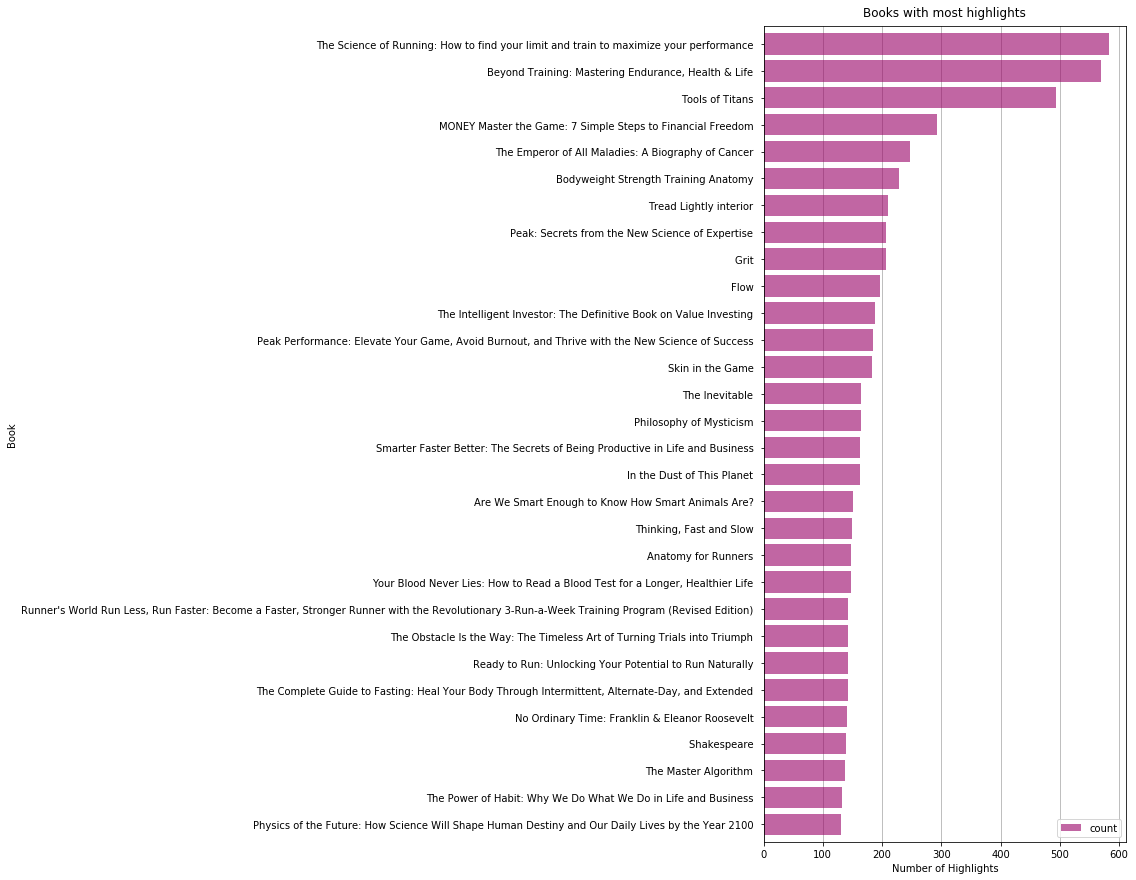

In [13]:
ax = book_most_highlighted.plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, color='#990066', 
                                    edgecolor=None, zorder=2)

n_groups = len(book_most_highlighted)
index = np.arange(n_groups)

ax.xaxis.grid(True)
ax.set_xlabel('Number of Highlights')
ax.set_ylabel("Book")
plt.yticks(index, book_most_highlighted.book_title)

ax.set_title('Books with most highlights', y=1.005)

# plt.savefig('images/lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

----

## Analysis by Year

In [14]:
year_counts = my_clippings['year'].value_counts().sort_index()
year_counts

2014     397
2015     633
2016    4357
2017    5531
2018    2382
Name: year, dtype: int64

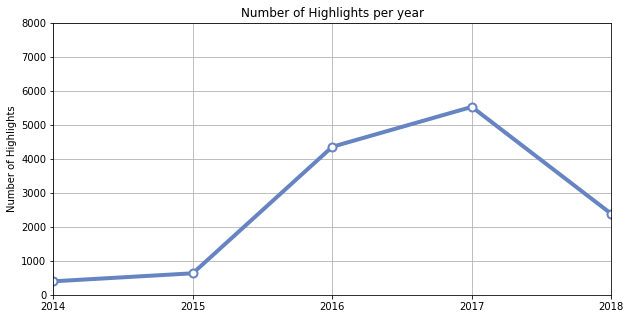

In [15]:
dataset = year_counts
chart_title = 'Number of Highlights per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 8000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Highlights')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis

In [16]:
month_counts = my_clippings['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']
month_counts.tail()

2018-04    306
2018-05    378
2018-06    299
2018-07    351
2018-08    475
Name: mnth_yr, dtype: int64

In [17]:
# not every month necessarily has a highlight, so fill in missing months with zero counts
#date_range = pd.date_range(start=min(highlights_10['timestamp']), end=max(highlights_10['timestamp']))
#months_range = date_range.map(lambda x: str(x.date())[:-3])
#index = np.unique(months_range)
# month_counts = month_counts.reindex(index, fill_value=0)

In [18]:
# total months
len(month_counts)

52

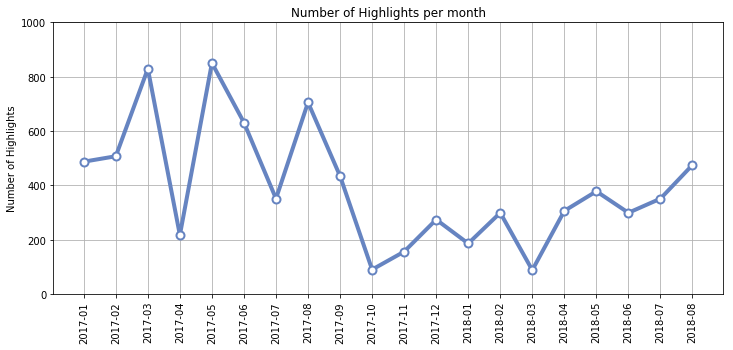

In [19]:
# a bit of a hackish solution, could use improvement
dataset = month_counts.tail(20)
chart_title = 'Number of Highlights per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

-----

## Highlights Per Day

In [20]:
my_clippings.tail()

,author,book_title,timestamp,highlight,location,num_pages,date,year,month,mnth_yr,day,dow,hour
13295,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:24:55,Use it to develop a vision for your life and t...,Location 1102-1105,72,2018-08-29,2018,8,2018-08,29,2,22
13296,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:25:10,The Small-Focus Question: “What’s my ONE Thing...,Location 1105-1109,73,2018-08-29,2018,8,2018-08,29,2,22
13297,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:26:12,"“Success is simple. Do what’s right, the right...",Location 1113-1114,73,2018-08-29,2018,8,2018-08,29,2,22
13298,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 22:30:19,"For example: “For my job, what’s the ONE Thing...",Location 1135-1137,75,2018-08-29,2018,8,2018-08,29,2,22
13299,Gary Keller,The Surpisingly Simple Truth Behind Extraordin...,2018-08-29 23:57:04,"“People do not decide their futures, they deci...",Location 1186-1188,78,2018-08-29,2018,8,2018-08,29,2,23


In [21]:
daily_counts = my_clippings['date'].value_counts().sort_index()
daily_counts.columns = ['Count']

In [22]:
# daily_counts.tail(10)

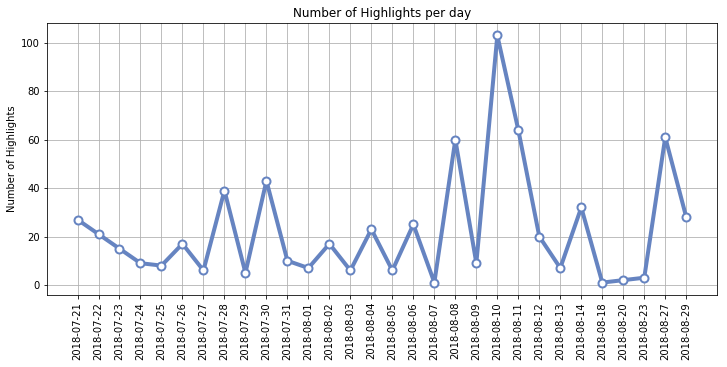

In [23]:
# a bit of a hackish solution, could use improvement
dataset = daily_counts.tail(30)
chart_title = 'Number of Highlights per day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [24]:
daily_counts.to_csv("data/daily_count_kindle_clippings.csv")

------

## Export Notes from Specific Book

In [25]:
def print_book(title):
    book_notes = my_clippings[my_clippings['book_title'] == title]
    print(book_notes.iloc[0]['book_title'])
    print("by " + book_notes.iloc[0]['author'])
    print("---------------------------")
    for index, row in book_notes.iterrows():
        print(row['highlight'])
        print("pg: " + row['num_pages'] + " | " + row['location'] + " | " + str(row['timestamp']))
        print("")

In [26]:
book_titles = my_clippings['book_title'].unique()
print("Latest Books with Highlights: ")
for i in book_titles[-15:]:
    print(i)

Latest Books with Highlights: 
Roadside Picnic (Rediscovered Classics) 
The Blue Zones 
A la recherche du temps perdu (l'intégrale) (French Edition) 
Data Strategy: How to Profit from a World of Big Data, Analytics and the Internet of Things 
Statistics for Machine Learning 
The High Road to China 
Tibet on Fire 
The Heart of the World 
The Tibetan Book of the Dead 
Tibetan Buddhism A Very Short Introduction (Very Short Introductions) 
Slouching Towards Bethlehem 
Heart of Darkness and Selected Short Fiction 
The Surpisingly Simple Truth Behind Extraordinary Results 
Peak Performance: Elevate Your Game, Avoid Burnout, and Thrive with the New Science of Success 
Endymion 


In [28]:
# Display Individual Book's Clippings
# Uncomment and configure to title of 
# print_book('The Surpisingly Simple Truth Behind Extraordinary Results ')